In [53]:
import torch
import timm
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Load the Model
num_output_classes = 24  # Same as used during training

mm = timm.create_model(
     "vit_base_patch8_224",
     pretrained=True,
     in_chans=1,
     num_classes=num_output_classes,
     patch_size=128,) #change this to 224, 128, 64

mm.load_state_dict(torch.load("models/best_model_128.pt", map_location=torch.device('cpu'))) #change this to 64, 128, 224
#mm.eval()
#mm = model.to(device)

<All keys matched successfully>

In [54]:
print(mm)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 768, kernel_size=(128, 128), stride=(128, 128))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Ident

In [55]:
ee = AttentionExtract(mm, method='fx')

In [56]:
#Prepare the Image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the model's input size
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize for grayscale
    ])
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return input_tensor

#Forward Pass to Extract Attention Maps
image_path = "/Users/annastuckert/Documents/GitHub/facemap_avs/first_image.jpg"  # Replace with your image path
input_tensor = preprocess_image(image_path)

In [57]:
output = ee(input_tensor)

In [58]:
att_mat =output['blocks.11.attn.softmax']


In [59]:
print(att_mat.shape)

torch.Size([1, 12, 2, 2])


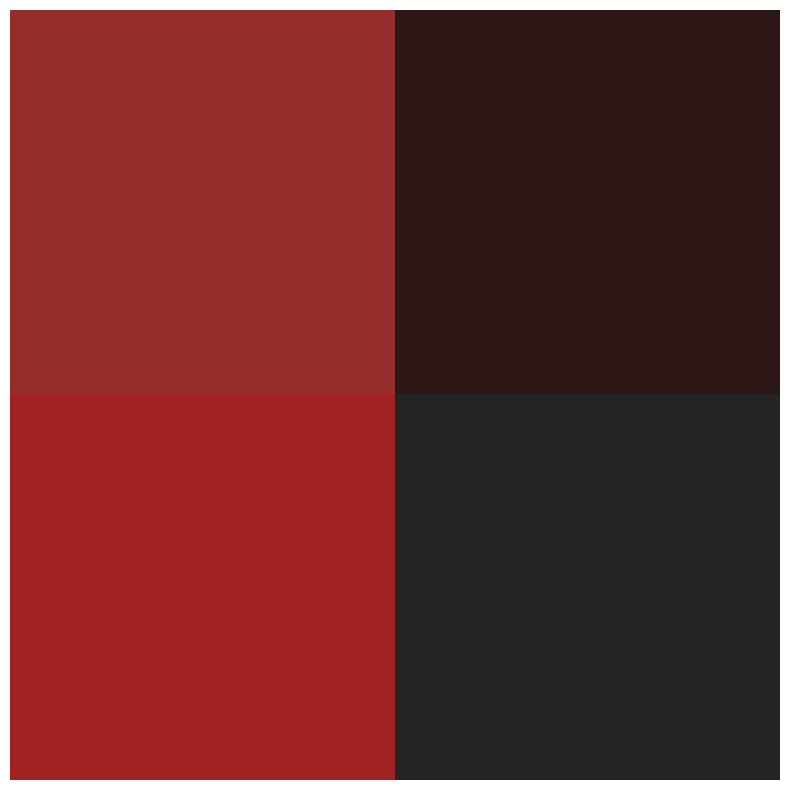

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Your attention tensor
attention_tensor = torch.tensor([[[[1.0000e+00, 7.8763e-24],
                                     [1.0000e+00, 3.3209e-25]],

                                    [[8.7875e-20, 1.0000e+00],
                                     [5.9862e-24, 1.0000e+00]],

                                    [[1.0000e+00, 1.6058e-37],
                                     [1.0000e+00, 2.0562e-40]],

                                    [[9.9975e-01, 2.5016e-04],
                                     [1.0000e+00, 1.6065e-06]],

                                    [[1.0000e+00, 2.3684e-15],
                                     [1.0000e+00, 1.0344e-17]],

                                    [[2.1024e-01, 7.8976e-01],
                                     [3.1610e-01, 6.8390e-01]],

                                    [[4.1398e-14, 1.0000e+00],
                                     [2.5753e-17, 1.0000e+00]],

                                    [[1.3607e-03, 9.9864e-01],
                                     [3.9586e-04, 9.9960e-01]],

                                    [[6.3755e-12, 1.0000e+00],
                                     [3.1041e-14, 1.0000e+00]],

                                    [[9.9493e-01, 5.0731e-03],
                                     [9.9989e-01, 1.0777e-04]],

                                    [[1.7313e-15, 1.0000e+00],
                                     [4.5229e-18, 1.0000e+00]],

                                    [[1.0000e+00, 6.6104e-36],
                                     [1.0000e+00, 1.4262e-38]]]])

# Average the attention values and normalize for visualization
attention_map = attention_tensor.mean(dim=1).numpy()
attention_map_normalized = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())

# Load and resize the image
image_path = '/Users/annastuckert/Documents/GitHub/facemap_avs/first_image.jpg'  # Update to your image path
image = Image.open(image_path).resize((attention_map.shape[1], attention_map.shape[2]))

# Convert image to numpy array
image_array = np.array(image) / 255.0  # Normalize pixel values

# Create a red heatmap
heatmap = np.zeros((*attention_map.shape[1:], 3))
heatmap[..., 0] = attention_map_normalized  # Red channel

# Overlay heatmap on the image
overlay = 0.5 * image_array + 0.5 * heatmap

# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis('off')
plt.show()


In [29]:
for n, t in output.items():
    print(n, t.shape)

blocks.0.attn.softmax torch.Size([1, 12, 2, 2])
blocks.1.attn.softmax torch.Size([1, 12, 2, 2])
blocks.2.attn.softmax torch.Size([1, 12, 2, 2])
blocks.3.attn.softmax torch.Size([1, 12, 2, 2])
blocks.4.attn.softmax torch.Size([1, 12, 2, 2])
blocks.5.attn.softmax torch.Size([1, 12, 2, 2])
blocks.6.attn.softmax torch.Size([1, 12, 2, 2])
blocks.7.attn.softmax torch.Size([1, 12, 2, 2])
blocks.8.attn.softmax torch.Size([1, 12, 2, 2])
blocks.9.attn.softmax torch.Size([1, 12, 2, 2])
blocks.10.attn.softmax torch.Size([1, 12, 2, 2])
blocks.11.attn.softmax torch.Size([1, 12, 2, 2])


POssibly interesting resources https://github.com/facebookresearch/dino/blob/main/visualize_attention.py

In [7]:
import timm
import torch
from timm.utils import AttentionExtract
timm.layers.set_fused_attn(False)
mm = timm.create_model('vit_base_patch16_224')
#mm.load_state_dict(torch.load("models/best_model.pt", map_location=torch.device('cpu')))
input = torch.randn(2,3,224,224)
ee = AttentionExtract(mm, method='fx')
oo = ee(input)



RuntimeError: Error(s) in loading state_dict for VisionTransformer:
	size mismatch for pos_embed: copying a param with shape torch.Size([1, 2, 768]) from checkpoint, the shape in current model is torch.Size([1, 197, 768]).
	size mismatch for patch_embed.proj.weight: copying a param with shape torch.Size([768, 1, 224, 224]) from checkpoint, the shape in current model is torch.Size([768, 3, 16, 16]).
	size mismatch for head.weight: copying a param with shape torch.Size([24, 768]) from checkpoint, the shape in current model is torch.Size([1000, 768]).
	size mismatch for head.bias: copying a param with shape torch.Size([24]) from checkpoint, the shape in current model is torch.Size([1000]).

In [32]:
oo['blocks.11.attn.softmax']

tensor([[[[0.0057, 0.0050, 0.0054,  ..., 0.0069, 0.0036, 0.0039],
          [0.0047, 0.0053, 0.0031,  ..., 0.0077, 0.0032, 0.0052],
          [0.0061, 0.0053, 0.0038,  ..., 0.0059, 0.0059, 0.0046],
          ...,
          [0.0045, 0.0070, 0.0041,  ..., 0.0065, 0.0043, 0.0057],
          [0.0077, 0.0048, 0.0049,  ..., 0.0044, 0.0063, 0.0042],
          [0.0051, 0.0060, 0.0036,  ..., 0.0074, 0.0064, 0.0042]],

         [[0.0039, 0.0053, 0.0121,  ..., 0.0056, 0.0053, 0.0059],
          [0.0057, 0.0048, 0.0063,  ..., 0.0038, 0.0045, 0.0065],
          [0.0056, 0.0040, 0.0050,  ..., 0.0049, 0.0033, 0.0066],
          ...,
          [0.0038, 0.0031, 0.0063,  ..., 0.0048, 0.0059, 0.0037],
          [0.0048, 0.0044, 0.0053,  ..., 0.0048, 0.0041, 0.0038],
          [0.0049, 0.0021, 0.0046,  ..., 0.0042, 0.0061, 0.0049]],

         [[0.0044, 0.0067, 0.0078,  ..., 0.0071, 0.0052, 0.0045],
          [0.0062, 0.0037, 0.0031,  ..., 0.0054, 0.0052, 0.0065],
          [0.0046, 0.0076, 0.0048,  ..., 0

In [31]:
for n, t in oo.items():
    print(n, t.shape)

blocks.0.attn.softmax torch.Size([2, 12, 197, 197])
blocks.1.attn.softmax torch.Size([2, 12, 197, 197])
blocks.2.attn.softmax torch.Size([2, 12, 197, 197])
blocks.3.attn.softmax torch.Size([2, 12, 197, 197])
blocks.4.attn.softmax torch.Size([2, 12, 197, 197])
blocks.5.attn.softmax torch.Size([2, 12, 197, 197])
blocks.6.attn.softmax torch.Size([2, 12, 197, 197])
blocks.7.attn.softmax torch.Size([2, 12, 197, 197])
blocks.8.attn.softmax torch.Size([2, 12, 197, 197])
blocks.9.attn.softmax torch.Size([2, 12, 197, 197])
blocks.10.attn.softmax torch.Size([2, 12, 197, 197])
blocks.11.attn.softmax torch.Size([2, 12, 197, 197])


In [37]:
def preprocess_image(image_path):
    image = Image.open(image_path)  # Convert to grayscale
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the model's input size
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize for grayscale
    ])
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return input_tensor

In [38]:
image_path = "/Users/annastuckert/Documents/GitHub/facemap_avs/cam1_G7c1_1_img1383_pad_rescale_augmented.jpg"  # Replace with your image path
input_tensor = preprocess_image(image_path)

In [39]:
output= ee(input_tensor)

In [42]:
for n, t in output.items():
    print(n, t.shape)

blocks.0.attn.softmax torch.Size([1, 12, 197, 197])
blocks.1.attn.softmax torch.Size([1, 12, 197, 197])
blocks.2.attn.softmax torch.Size([1, 12, 197, 197])
blocks.3.attn.softmax torch.Size([1, 12, 197, 197])
blocks.4.attn.softmax torch.Size([1, 12, 197, 197])
blocks.5.attn.softmax torch.Size([1, 12, 197, 197])
blocks.6.attn.softmax torch.Size([1, 12, 197, 197])
blocks.7.attn.softmax torch.Size([1, 12, 197, 197])
blocks.8.attn.softmax torch.Size([1, 12, 197, 197])
blocks.9.attn.softmax torch.Size([1, 12, 197, 197])
blocks.10.attn.softmax torch.Size([1, 12, 197, 197])
blocks.11.attn.softmax torch.Size([1, 12, 197, 197])
